"Image Processing: Grayscale Conversion and Global Histogram Equalization"

This notebook presents a hands-on implementation of image processing transformations using scratch code. First, the program reads an image, converts it to grayscale using library functions, and displays its histogram. Subsequently, a global histogram equalization is applied to the image, treating it as a 2D array, and the converted image along with its histogram are displayed. This step-by-step walkthrough allows for a practical understanding of grayscale conversion, histogram visualization, and the impact of global histogram equalization on image enhancement.

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

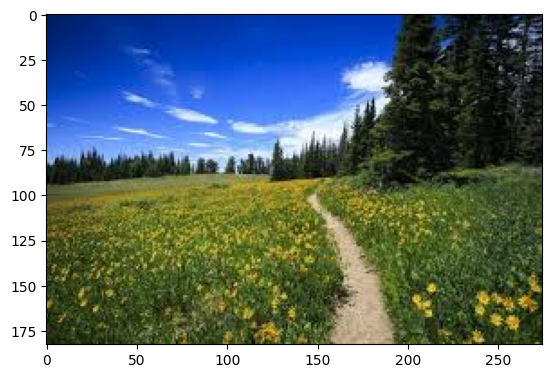

In [27]:
img = cv2.imread("/content/photo.jfif")
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img1)

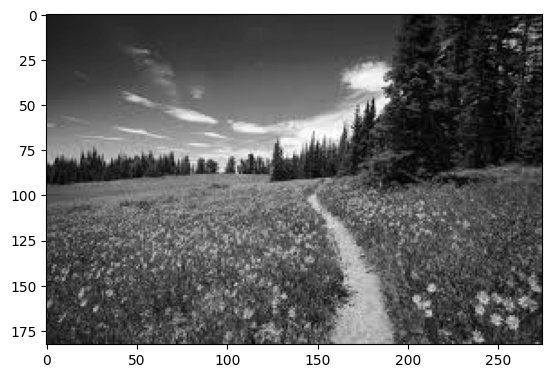

In [28]:
grayImg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(grayImg,cmap = "gray")

### Histogram

(array([ 4505.,  8169., 12156.,  9538.,  6583.,  4009.,  2637.,  1467.,
          696.,   565.]),
 array([  0. ,  25.3,  50.6,  75.9, 101.2, 126.5, 151.8, 177.1, 202.4,
        227.7, 253. ]),
 <BarContainer object of 10 artists>)

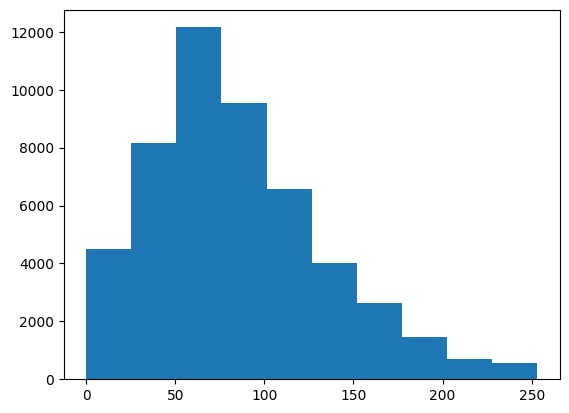

In [29]:
plt.hist(grayImg.ravel())

#### Histogram Equalization

Histogram equalization is an image processing technique that enhances contrast by redistributing pixel intensity values across the entire range. It achieves this by transforming the cumulative distribution function of pixel intensities, resulting in improved visibility of details and features in the image. Histogram equalization is commonly used for image enhancement and is particularly effective in addressing images with low contrast.

In [30]:
hist = np.bincount(grayImg.ravel())

In [31]:

hist

array([  7, 123,  82,  67, 115, 111, 114, 148, 167, 160, 187, 192, 210,
       184, 234, 207, 222, 190, 210, 227, 240, 238, 217, 219, 226, 208,
       210, 233, 226, 236, 244, 231, 260, 275, 282, 284, 298, 299, 342,
       350, 335, 371, 365, 369, 380, 424, 426, 411, 437, 416, 465, 512,
       537, 525, 518, 528, 518, 511, 485, 516, 620, 582, 470, 536, 475,
       480, 456, 466, 417, 473, 474, 402, 450, 405, 402, 398, 392, 396,
       411, 403, 400, 428, 385, 371, 411, 360, 407, 377, 356, 359, 343,
       350, 357, 348, 330, 363, 324, 343, 310, 329, 334, 351, 301, 311,
       304, 272, 316, 270, 262, 275, 247, 291, 274, 279, 293, 276, 256,
       250, 247, 229, 252, 238, 235, 232, 203, 254, 216, 219, 224, 206,
       207, 194, 185, 193, 169, 175, 192, 192, 165, 159, 155, 161, 141,
       127, 113, 130, 132, 121, 110, 119, 111, 109, 118, 125, 111,  96,
        84, 126, 113, 120,  97,  89, 102, 110, 119, 121,  92, 122,  98,
        70,  99,  95,  88,  87,  87,  87,  95,  86,  60,  89,  9

In [32]:
pdf = hist/np.sum(hist)

In [33]:
pdf

array([0.0001391 , 0.00244411, 0.00162941, 0.00133135, 0.00228515,
       0.00220566, 0.00226528, 0.00294088, 0.00331843, 0.00317933,
       0.00371585, 0.0038152 , 0.00417288, 0.00365623, 0.00464978,
       0.00411326, 0.00441133, 0.00377546, 0.00417288, 0.00451068,
       0.004769  , 0.00472926, 0.00431197, 0.00435171, 0.00449081,
       0.00413313, 0.00417288, 0.00462991, 0.00449081, 0.00468952,
       0.00484848, 0.00459016, 0.00516642, 0.00546448, 0.00560358,
       0.00564332, 0.00592151, 0.00594138, 0.00679583, 0.00695479,
       0.00665673, 0.00737208, 0.00725286, 0.00733234, 0.00755092,
       0.00842524, 0.00846498, 0.00816692, 0.00868356, 0.00826627,
       0.00923994, 0.01017387, 0.01067064, 0.01043219, 0.01029309,
       0.0104918 , 0.01029309, 0.010154  , 0.00963736, 0.01025335,
       0.01231992, 0.01156483, 0.00933929, 0.01065077, 0.00943865,
       0.009538  , 0.0090611 , 0.00925981, 0.00828614, 0.00939891,
       0.00941878, 0.00798808, 0.00894188, 0.00804769, 0.00798

In [34]:
cdf = np.cumsum(pdf)

In [35]:
cdf

array([1.39095877e-04, 2.58320914e-03, 4.21261798e-03, 5.54396423e-03,
       7.82911078e-03, 1.00347740e-02, 1.23000497e-02, 1.52409339e-02,
       1.85593641e-02, 2.17386985e-02, 2.54545455e-02, 2.92697466e-02,
       3.34426230e-02, 3.70988574e-02, 4.17486339e-02, 4.58618977e-02,
       5.02732240e-02, 5.40486836e-02, 5.82215599e-02, 6.27322404e-02,
       6.75012419e-02, 7.22305017e-02, 7.65424739e-02, 8.08941878e-02,
       8.53849975e-02, 8.95181321e-02, 9.36910084e-02, 9.83209141e-02,
       1.02811724e-01, 1.07501242e-01, 1.12349727e-01, 1.16939891e-01,
       1.22106309e-01, 1.27570790e-01, 1.33174367e-01, 1.38817685e-01,
       1.44739195e-01, 1.50680576e-01, 1.57476403e-01, 1.64431197e-01,
       1.71087928e-01, 1.78460010e-01, 1.85712866e-01, 1.93045206e-01,
       2.00596125e-01, 2.09021361e-01, 2.17486339e-01, 2.25653254e-01,
       2.34336811e-01, 2.42603080e-01, 2.51843020e-01, 2.62016890e-01,
       2.72687531e-01, 2.83119722e-01, 2.93412817e-01, 3.03904620e-01,
      

In [36]:
transform_map = np.floor(255 * cdf).astype(np.uint8)


In [37]:
transform_map

array([  0,   0,   1,   1,   1,   2,   3,   3,   4,   5,   6,   7,   8,
         9,  10,  11,  12,  13,  14,  15,  17,  18,  19,  20,  21,  22,
        23,  25,  26,  27,  28,  29,  31,  32,  33,  35,  36,  38,  40,
        41,  43,  45,  47,  49,  51,  53,  55,  57,  59,  61,  64,  66,
        69,  72,  74,  77,  80,  82,  85,  87,  90,  93,  96,  98, 101,
       103, 106, 108, 110, 112, 115, 117, 119, 121, 123, 125, 127, 129,
       131, 133, 135, 138, 140, 141, 144, 145, 147, 149, 151, 153, 155,
       156, 158, 160, 162, 164, 165, 167, 169, 170, 172, 174, 175, 177,
       178, 180, 181, 183, 184, 185, 187, 188, 189, 191, 192, 194, 195,
       196, 198, 199, 200, 201, 202, 204, 205, 206, 207, 208, 209, 210,
       211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 220, 221, 222,
       223, 223, 224, 224, 225, 226, 226, 227, 227, 228, 229, 229, 230,
       230, 231, 231, 232, 232, 233, 233, 234, 234, 235, 236, 236, 237,
       237, 238, 238, 238, 239, 239, 240, 240, 241, 241, 241, 24

In [38]:
img_list = list(grayImg.flatten())

In [39]:
eq_img_list = [transform_map[p] for p in img_list]

In [40]:
eq_img_array = np.reshape(np.asarray(eq_img_list), grayImg.shape)

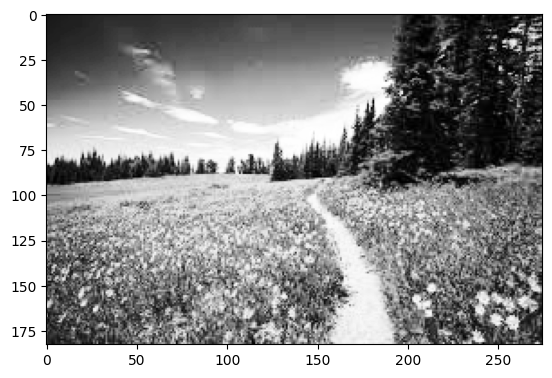

In [41]:
plt.imshow(eq_img_array,cmap = "gray")

In [42]:
grayImg

array([[ 27,  27,  27, ...,  27,  11,  29],
       [ 27,  27,  27, ...,  20,  14,  37],
       [ 27,  27,  28, ...,  66,  56,  70],
       ...,
       [ 48,  36,  37, ...,  24,  32,  45],
       [ 49,  37,  33, ...,  74,  46,  27],
       [ 47,  39,  36, ..., 155,  95,  46]], dtype=uint8)

In [43]:
eq_img_array

array([[ 25,  25,  25, ...,  25,   7,  27],
       [ 25,  25,  25, ...,  17,  10,  38],
       [ 25,  25,  26, ..., 106,  80, 115],
       ...,
       [ 59,  36,  38, ...,  21,  31,  53],
       [ 61,  38,  32, ..., 123,  55,  25],
       [ 57,  41,  36, ..., 230, 164,  55]], dtype=uint8)

(array([4948., 4767., 5051., 5241., 5215., 4705., 5357., 4762., 5268.,
        5011.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

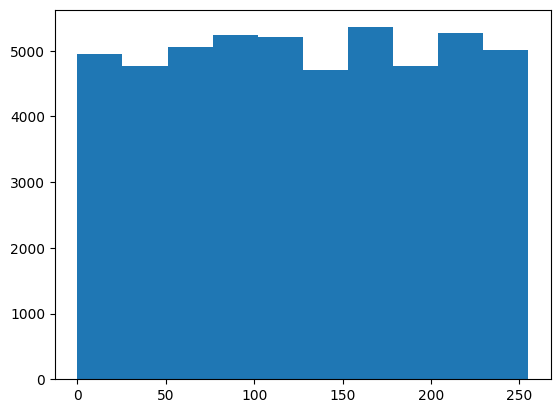

In [44]:
plt.hist(eq_img_array.ravel())

### AHE and CLAHE

In [45]:
equ = cv2.equalizeHist(grayImg)

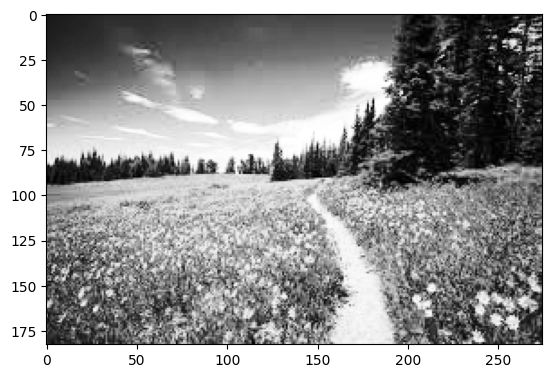

In [46]:
plt.imshow(equ,cmap="gray")

(array([4948., 4767., 5051., 5241., 4823., 5097., 5053., 5066., 5157.,
        5122.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

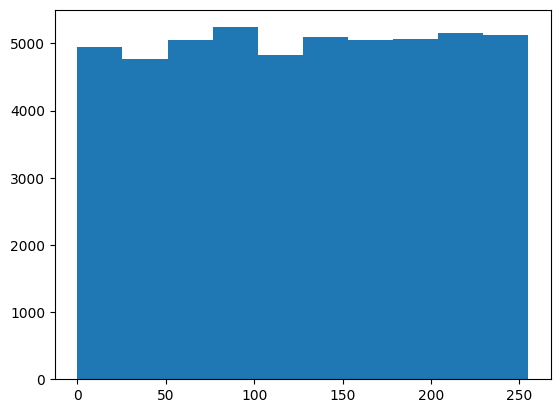

In [47]:
plt.hist(equ.ravel())

In [48]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
equ1 = clahe.apply(grayImg)

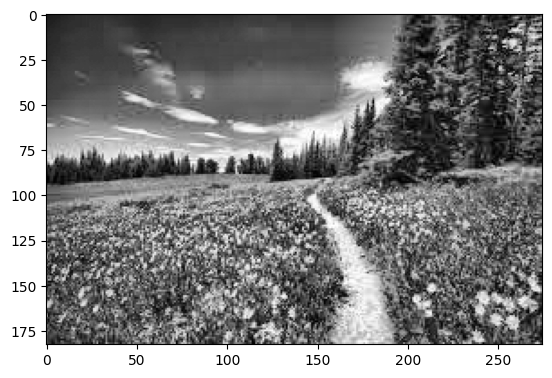

In [49]:
plt.imshow(equ1,cmap="gray")

(array([2597., 5690., 9683., 8178., 7750., 5478., 4020., 3167., 2296.,
        1466.]),
 array([  1. ,  26.4,  51.8,  77.2, 102.6, 128. , 153.4, 178.8, 204.2,
        229.6, 255. ]),
 <BarContainer object of 10 artists>)

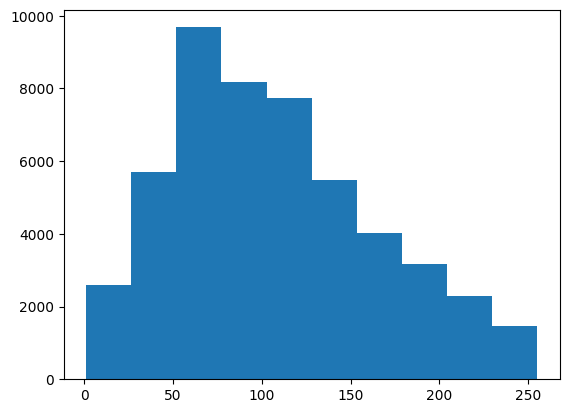

In [50]:
plt.hist(equ1.ravel())